In [1]:
import numpy as np
rng = np.random.default_rng(0)
n, p = 4, 5
X = rng.standard_normal((n, p))
Y = rng.poisson(lam=20, size=n)

In [2]:
from glmnet import FishNet
nlambda, lambda_min_ratio = 3, 0.2
L = FishNet(nlambda=nlambda, lambda_min_ratio=lambda_min_ratio)
L.fit(X, Y)


FishNet(lambda_values=None, lambda_fractional=True, alpha=1.0, lower_limits=array([-9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35]), upper_limits=array([9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35]), penalty_factor=array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]]), fit_intercept=True, standardize=True, family=GLMFamilySpec(base=<statsmodels.genmod.families.family.Gaussian object at 0x105fd38b0>), control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05), regularized_estimator=<class 'glmnet.regularized_glm.RegGLM'>, lambda_min_ratio=0.2, nlambda=3, df_max=6, univariate_beta=True, type_logistic='Newton')

In [3]:
import rpy2
%load_ext rpy2.ipython
%R -i X,Y,nlambda,lambda_min_ratio


Call:  glmnet(x = X, y = Y, family = "poisson", nlambda = nlambda, lambda.min.ratio = lambda_min_ratio) 

  Df  %Dev Lambda
1  0  0.00 0.6751
2  2 76.82 0.3019
3  3 95.28 0.1350


Loading required package: Matrix
Loaded glmnet 4.1-8


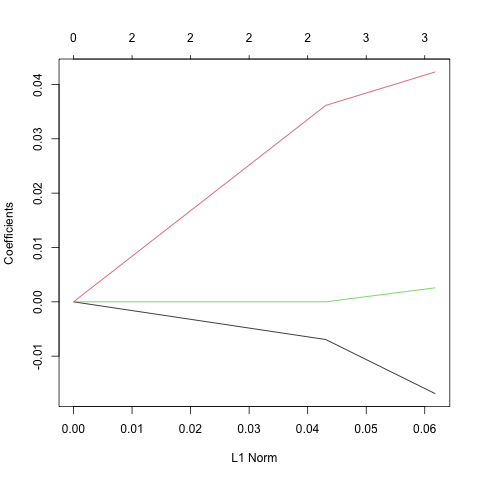

In [4]:
%%R
library(glmnet)
G = glmnet(X, Y, family='poisson', nlam=nlambda, lambda.min.ratio=lambda_min_ratio)
plot(G)
G

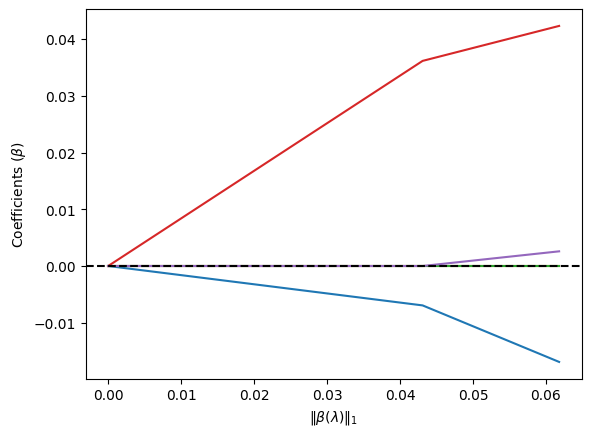

In [5]:
ax = L.plot_coefficients(xvar='norm')

In [6]:
L.summary_

,Degrees of Freedom,Fraction Deviance Explained
lambda,,
9.900000e+35,0,6.250622e-13
3.019251e-01,2,7.682079e-01
1.350250e-01,3,9.527552e-01


In [7]:
%%R -o C_R,I_R
C_R = as.matrix(coef(G))[-1,]
I_R = as.matrix(coef(G))[1,]

In [8]:
np.linalg.norm(C_R.T - L.coefs_) / np.linalg.norm(L.coefs_)

1.8343192275800168e-14

In [9]:
np.linalg.norm(I_R - L.intercepts_) / np.linalg.norm(L.intercepts_)

8.291545089665639e-17

In [10]:
L.coefs_.shape

(3, 5)

In [11]:
L._fit['nin'].max()

4